# Réaffectation des individus

Dans cette partie, l'objectif est de réaffecter les individus dans les groupes avec des variables illustratives. On commencera par affecter la segmentation variable en orange en utilisant les variables vertes, puis nous utiliserons un jeu de variables spécifique détaillé dans sa partie dédiée.

## Setup

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Classification en utilisant les variables vertes

In [2]:
green = pd.read_csv("../data/vert.csv")
green

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,cluster
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,0.0,...,2,2,2,2,2,2,2,2,2,3
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,0.0,...,4,4,4,4,4,4,4,4,4,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,0.0,...,4,4,4,4,4,4,4,4,4,1
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,0.0,...,4,4,5,5,5,5,5,4,4,4
4,5,MET20_1869308,0.812315,0,1,0,0,2,0.0,1.0,...,4,4,4,4,4,4,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,1,0,1,0,3,0.0,1.0,...,4,4,5,5,5,5,5,4,5,2
4996,4997,MET20_80000348,1.257884,0,1,0,0,2,0.0,1.0,...,4,5,5,5,5,5,5,5,5,2
4997,4998,MET20_288029,1.094695,0,1,0,0,2,0.0,2.0,...,5,5,5,5,5,5,5,5,5,2
4998,4999,MET20_1235808,2.022023,0,0,1,0,3,0.0,1.0,...,5,4,5,5,5,5,5,5,5,2


In [3]:
orange = pd.read_csv("../data/orange.csv")
orange

,cle,Respondent_ID,weight,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,...,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,cluster
0,1,MET20_999999996,2.501255,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
1,2,MET20_98888888,0.722914,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,3
2,3,MET20_1978307,1.039611,3,2,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,0
3,4,MET20_1302078,0.976590,1,2,2,2,3,2,3,...,1,2,3,3,3,2,2,1,2,0
4,5,MET20_1869308,0.812315,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,3,2,3,4,3,2,2,...,1,2,1,1,1,1,1,1,1,3
4996,4997,MET20_80000348,1.257884,2,3,4,3,3,2,4,...,2,3,2,2,2,2,3,2,4,1
4997,4998,MET20_288029,1.094695,3,4,4,3,2,2,4,...,2,3,3,3,2,3,3,2,3,1
4998,4999,MET20_1235808,2.022023,3,3,4,3,3,2,3,...,3,2,3,2,3,2,2,1,3,1


In [4]:
data = pd.merge(left=green.iloc[:, :-1], right=orange[["cluster", "Respondent_ID"]], how="right", left_on="Respondent_ID", right_on="Respondent_ID")
data = data.drop(columns=["Respondent_ID"])
data

,cle,weight,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,...,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,cluster
0,1,2.501255,1,0,0,0,1,2.0,0.0,2,...,2,2,2,2,2,2,2,2,2,0
1,2,0.722914,1,0,0,0,1,5.0,0.0,2,...,4,4,4,4,4,4,4,4,4,3
2,3,1.039611,1,0,0,0,1,2.0,0.0,5,...,4,4,4,4,4,4,4,4,4,0
3,4,0.976590,1,1,1,0,1,1.0,0.0,2,...,4,4,5,5,5,5,5,4,4,0
4,5,0.812315,0,1,0,0,2,0.0,1.0,1,...,4,4,4,4,4,4,4,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.905997,1,0,1,0,3,0.0,1.0,5,...,4,4,5,5,5,5,5,4,5,3
4996,4997,1.257884,0,1,0,0,2,0.0,1.0,1,...,4,5,5,5,5,5,5,5,5,1
4997,4998,1.094695,0,1,0,0,2,0.0,2.0,1,...,5,5,5,5,5,5,5,5,5,1
4998,4999,2.022023,0,0,1,0,3,0.0,1.0,1,...,5,4,5,5,5,5,5,5,5,1


In [5]:
for col in data.columns:
    print(col, ":", data[col].unique())

cle : [   1    2    3 ... 4998 4999 5000]
weight : [2.50125479 0.72291398 1.0396114  0.97659004 0.81231458 0.6947629
 1.31009128 1.60817197 0.87813474 0.76319432 0.73972344 0.9306512
 0.90599731 0.79808601 0.82476154 1.12448398 0.84223815 1.16148612
 0.61829965 1.05648699 0.45722218 0.96430857 1.27588793 2.96053919
 0.68416634 0.8556566  1.2999283  1.14350709 0.44243409 0.59830178
 1.16172533 0.96175765 1.02399634 0.62815034 1.01241678 0.74707694
 0.97708028 1.05595691 0.7058318  0.92519529 0.85283998 0.67229195
 0.96127509 0.99654    1.43913012 1.33096353 0.96147308 0.39229069
 0.4645066  1.11789174 1.39487186 0.56125242 0.93018425 1.3840512
 1.09469527 1.00763974 0.53458272 0.9463952  0.91578562 0.45866503
 1.46068651 0.55245082 1.06102959 1.42796612 0.83790157 0.67919973
 0.89674232 0.50225677 0.65831198 1.01765657 1.32063863 1.02348256
 1.23664994 0.8394657  0.60267683 0.62282093 1.73886712 2.22118408
 1.1799908  1.21750743 0.7589793  0.82666212 0.89379045 1.16206917
 1.93875021 0.

In [6]:
data = data.fillna(-1)

In [7]:
data.isnull().values.any()

np.False_

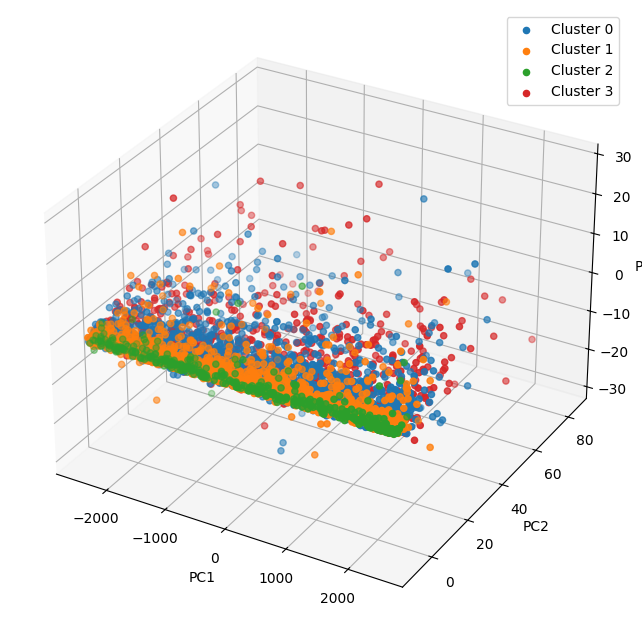

In [8]:
# Représentation en 3D dans l'espace des composantes principales
pca = PCA(n_components=3)
features_pca = pca.fit_transform(data.values)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    cluster_indices = data[data['cluster'] == cluster].index
    ax.scatter(features_pca[cluster_indices, 0], features_pca[cluster_indices, 1], features_pca[cluster_indices, 2], label=f'Cluster {cluster}')
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

## Initialisation du modèle

Dans le cadre de cet exercice, nous nous concentrerons d'abord sur l'utilisation de l'agorithme Random Forest pour tenter de résoudre la tâche de classification avec un score élevé. Ce choix se justfie par les performances très élevées du Random Forest dans la réalisation de la Partie 2.

In [9]:
X = data.drop(columns=['cluster'])
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

print(len(X_train), len(X_test))

3500 1500


In [10]:
n_estimators = 1000

rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=23)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=23)

In [11]:
y_pred = rf_model.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5233333333333333
              precision    recall  f1-score   support

           0       0.52      0.67      0.59       620
           1       0.51      0.54      0.53       425
           2       0.38      0.22      0.28       104
           3       0.62      0.33      0.43       351

    accuracy                           0.52      1500
   macro avg       0.51      0.44      0.46      1500
weighted avg       0.53      0.52      0.51      1500



On se rend compte que le Random Forest associé à l'hyperparamètre utilisé lors de la Partie 2 n'est pas très efficace. On va donc tenter d'optimiser l'hyperparamètre en utilisant la technique de recherche par grille.

In [13]:
param_grid = {
    'n_estimators': list(range(1100, 3100, 100)),
    'max_depth': list(range(10, 110, 10)),
}


In [14]:
# On configure le GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    verbose=3,
    n_jobs=-1,
)

# On lance la recherche
grid_search.fit(X_train, y_train)

# On affiche les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Meilleurs hyperparamètres : {'max_depth': 10, 'n_estimators': 1200}


In [15]:
# Récupérer le meilleur modèle
best_rf_model = grid_search.best_estimator_

# Évaluer sur les données de test
test_score = best_rf_model.score(X_test, y_test)
print(f"Score du modèle optimisé sur les données de test : {test_score:.2%}")


Score du modèle optimisé sur les données de test : 53.13%


On peut se rendre compte que malgré les optimisations, le meilleur modèle n'obtient que 53% en score d'accuracy. C'est une valer relativement faible, mais c'est le maximum obtenu pour cette tâche de classification.

## Classification en utilisant les variables spécifiques

Dans cette partie nous affecterons les individus dans les groupes à l'aide du jeu de variables suivant:
rs3 rs5 rs6 RS1 RS191 RS192 RS193 
RS102RECAP rs11recap2 RS11recap RS193bis RS2Recap RS56Recap RS2 RS11 
RS102

In [16]:
variables = pd.read_csv("../data/fic_epita_kantar_codes.csv", sep=";")
variables = variables[[
    "Respondent_ID", 
    "rs3", 
    "rs5", 
    "rs6", 
    "RS1", 
    "RS191", 
    "RS192", 
    "RS193", 
    "RS102RECAP", 
    "rs11recap2", 
    "RS11recap", 
    "RS193bis", 
    "RS2Recap", 
    "RS56Recap", 
    "RS2", 
    "RS11", 
    "RS102"
]]

variables

,Respondent_ID,rs3,rs5,rs6,RS1,RS191,RS192,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,MET20_999999996,1,1,5.0,1,1.0,2,2,4,1,2,NaN,1,1,24,0,4
1,MET20_98888888,1,1,2.0,1,1.0,2,2,1,1,2,NaN,4,1,50,0,1
2,MET20_1978307,1,1,9.0,2,1.0,1,2,3,2,1,NaN,3,2,37,1,3
3,MET20_1302078,2,3,NaN,2,1.0,2,2,2,1,2,NaN,5,3,63,0,2
4,MET20_1869308,1,1,6.0,1,2.0,2,2,3,2,1,NaN,3,1,44,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,MET20_779605,1,3,NaN,2,1.0,2,2,2,1,2,NaN,6,3,69,0,2
4996,MET20_80000348,1,7,NaN,2,2.0,1,2,1,1,2,NaN,4,3,53,0,1
4997,MET20_288029,1,3,NaN,1,2.0,2,1,2,1,2,2.0,6,3,75,0,2
4998,MET20_1235808,1,5,NaN,2,1.0,1,2,3,2,1,NaN,2,3,33,1,3


In [17]:
for col in variables.columns:
    if col != "Respondent_ID":
        print(col, ":", variables[col].unique())

rs3 : [1 2]
rs5 : [1 3 2 7 6 5 4]
rs6 : [ 5.  2.  9. nan  6.  8.  7.  3.  4. 10.  1.]
RS1 : [1 2]
RS191 : [ 1.  2.  3. nan]
RS192 : [2 1 3]
RS193 : [2 1]
RS102RECAP : [4 1 3 2]
rs11recap2 : [1 2 3 4]
RS11recap : [2 1]
RS193bis : [nan  1.  2.  3.]
RS2Recap : [1 4 3 5 2 6]
RS56Recap : [1 2 3]
RS2 : [24 50 37 63 44 29 26 73 36 40 32 60 65 76 34 70 49 61 51 27 58 67 54 78
 47 43 38 45 66 69 71 79 39 30 64 77 33 62 74 72 28 87 57 55 35 90 56 68
 42 53 80 48 25 52 46 59 75 81 23 84 83 31 82 91 41 85 21 20 22 19 18 86
 88 89]
RS11 : [0 1 2 3 4 6 5]
RS102 : [4 1 3 2 5 6 7 8]


In [18]:
variables = variables.fillna(-1)

In [28]:
data.isnull().values.any()

np.False_

In [19]:
data = pd.merge(left=variables, right=orange[["cluster", "Respondent_ID"]], left_on="Respondent_ID", right_on="Respondent_ID", how="right")
data = data.drop(columns=["Respondent_ID"])

data

,rs3,rs5,rs6,RS1,RS191,RS192,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102,cluster
0,1,1,5.0,1,1.0,2,2,4,1,2,-1.0,1,1,24,0,4,0
1,1,1,2.0,1,1.0,2,2,1,1,2,-1.0,4,1,50,0,1,3
2,1,1,9.0,2,1.0,1,2,3,2,1,-1.0,3,2,37,1,3,0
3,2,3,-1.0,2,1.0,2,2,2,1,2,-1.0,5,3,63,0,2,0
4,1,1,6.0,1,2.0,2,2,3,2,1,-1.0,3,1,44,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,-1.0,2,1.0,2,2,2,1,2,-1.0,6,3,69,0,2,3
4996,1,7,-1.0,2,2.0,1,2,1,1,2,-1.0,4,3,53,0,1,1
4997,1,3,-1.0,1,2.0,2,1,2,1,2,2.0,6,3,75,0,2,1
4998,1,5,-1.0,2,1.0,1,2,3,2,1,-1.0,2,3,33,1,3,1


Etant donné que la colonne RS2 (l'âge du sondé) représente une valeur non catégorique (il y autant de réponses que d'âges indiqués par les sondés), on peut standardiser cette colonne.

In [20]:
rs2_mean = np.mean(data["RS2"])
rs2_std = np.std(data["RS2"])

data["RS2"] = (data["RS2"] - rs2_mean) / rs2_std
data

,rs3,rs5,rs6,RS1,RS191,RS192,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102,cluster
0,1,1,5.0,1,1.0,2,2,4,1,2,-1.0,1,1,-1.950843,0,4,0
1,1,1,2.0,1,1.0,2,2,1,1,2,-1.0,4,1,-0.225608,0,1,3
2,1,1,9.0,2,1.0,1,2,3,2,1,-1.0,3,2,-1.088225,1,3,0
3,2,3,-1.0,2,1.0,2,2,2,1,2,-1.0,5,3,0.637010,0,2,0
4,1,1,6.0,1,2.0,2,2,3,2,1,-1.0,3,1,-0.623739,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,-1.0,2,1.0,2,2,2,1,2,-1.0,6,3,1.035141,0,2,3
4996,1,7,-1.0,2,2.0,1,2,1,1,2,-1.0,4,3,-0.026542,0,1,1
4997,1,3,-1.0,1,2.0,2,1,2,1,2,2.0,6,3,1.433272,0,2,1
4998,1,5,-1.0,2,1.0,1,2,3,2,1,-1.0,2,3,-1.353646,1,3,1


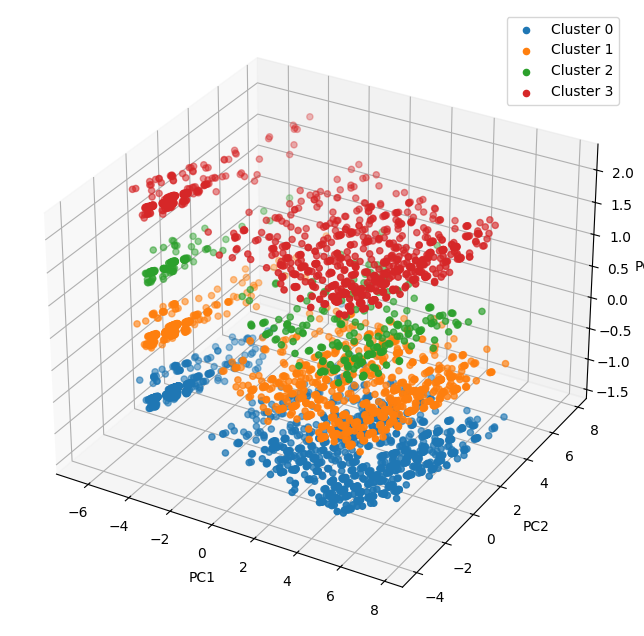

In [21]:
# Représentation en 3D dans l'espace des composantes principales
pca = PCA(n_components=3)
features_pca = pca.fit_transform(data.values)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    cluster_indices = data[data['cluster'] == cluster].index
    ax.scatter(features_pca[cluster_indices, 0], features_pca[cluster_indices, 1], features_pca[cluster_indices, 2], label=f'Cluster {cluster}')
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [22]:
X = data.drop(columns=['cluster'])
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

print(len(X_train), len(X_test))

3500 1500


In [23]:
n_estimators = 1000

rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=23)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=23)

In [24]:
y_pred = rf_model.predict(X_test)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.36533333333333334
              precision    recall  f1-score   support

           0       0.44      0.52      0.47       620
           1       0.32      0.33      0.32       425
           2       0.14      0.10      0.12       104
           3       0.29      0.23      0.25       351

    accuracy                           0.37      1500
   macro avg       0.30      0.29      0.29      1500
weighted avg       0.35      0.37      0.36      1500



L'accuracy est encore plus faible ici (seulement 37%). On va donc commencer par optimiser de nouveau les hyperparamètres du modèle.

In [33]:
param_grid = {
    'n_estimators': list(range(1100, 3100, 100)),
    'max_depth': list(range(10, 110, 10)),
}

In [34]:
# On configure le GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    verbose=3,
    n_jobs=-1,
)

# On lance la recherche
grid_search.fit(X_train, y_train)

# On affiche les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Meilleurs hyperparamètres : {'max_depth': 10, 'n_estimators': 1600}


In [35]:
# Récupérer le meilleur modèle
best_rf_model = grid_search.best_estimator_

# Évaluer sur les données de test
test_score = best_rf_model.score(X_test, y_test)
print(f"Score du modèle optimisé sur les données de test : {test_score:.2%}")


Score du modèle optimisé sur les données de test : 40.33%


On remarque une augmentation sensible de l'accuracy de 3% environ pour une valeur finale autour de 40%. C'est un score encore trop faible. De ce fait, on va envisager d'utiliser un autre algorithme comme KNN par exemple.

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.36533333333333334
              precision    recall  f1-score   support

           0       0.44      0.52      0.47       620
           1       0.32      0.33      0.32       425
           2       0.14      0.10      0.12       104
           3       0.29      0.23      0.25       351

    accuracy                           0.37      1500
   macro avg       0.30      0.29      0.29      1500
weighted avg       0.35      0.37      0.36      1500



Le niveau d'accuracy est très faible (autour de 37%). On va essayer d'optimiser les hyperparamètres du KNN.

In [29]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

In [30]:
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=3,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [31]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)
print("Accuracy sur l'ensemble de test :", accuracy)


Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Meilleur score : 0.3771428571428571
Accuracy sur l'ensemble de test : 0.372


Malgré les optimisations tentées, les résultats obtenus avec le modèle KNN restent médiocres. On en déduit que le modèle qu'il est préférable d'utiliser est le Random Forest, même si ses performances ne sont pas satisfaisantes.